In [2]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import seaborn as sns

In [3]:
# This function slices the unwanted text (introduction, etc.) at the beginning of the txt file 
# It takes a string 'my_str', and delete everything before the specified 'sub' 
def slicer_front(my_str,sub):
  index=my_str.find(sub)
  if index !=-1 :
        return my_str[index:] 
  else :
        raise Exception('Sub string not found!')

In [4]:
# This function slices the unwanted text (introduction, etc.) at the end of the txt file 
def slicer_back(my_str,sub):
  index=my_str.find(sub)
  if index !=-1 :
        return my_str[:index] 
  else :
        raise Exception('Sub string not found!')

In [5]:
# write a function to check distribution of each 'poem' after the split 
def see_len_dist(corpus):
    get_len_dist = []
    for i in corpus:
        get_len_dist.append(len(i))
    ax = sns.distplot(get_len_dist)
        # further stuff
    return ax

In [6]:
# write a function to check distribution of 'very short item' after the split 
def see_short_len_dist(corpus):
    get_len_dist = []
    for i in corpus:
        get_len_dist.append(len(i))
    ax = sns.distplot([i for i in get_len_dist if i<300])
        # further stuff
    return ax

In [7]:
# writ a function to read in data from a url 
def get_soup(target_url):
    r = requests.get(target_url)
    soup = BeautifulSoup(r.text, "html.parser")
    return soup

### Read Data

Read in from local file: poetry collection "Collected Poems by Dylan Thomas" 

In [8]:
with open('DylanThomas.txt',"r") as f:
    DT_raw = f.read().split('\n\n\n')
len(DT_raw)

201

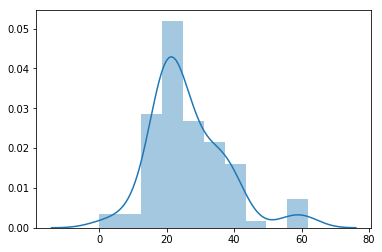

In [9]:
## Getting Rid of the Title 
see_short_len_dist(DT_raw)

We know from above the title length<200

In [10]:
DT_c = [i for i in DT_raw if len(i)>200]
len(DT_c)

111

Read in from website.

In [11]:
CP_raw = get_soup('https://raw.githubusercontent.com/tfavory/pmlg-poem-generator/master/model_training/corpus.txt')

In [12]:
CP = CP_raw.get_text().split('\n\n\n\n')
len(CP)

631

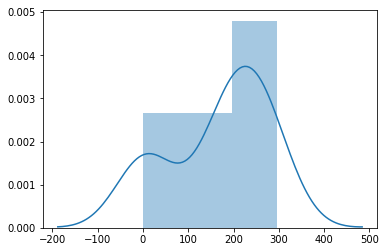

In [13]:
see_short_len_dist(CP)

In [14]:
CP_c = [i for i in CP if len(i)>200]
len(CP_c)

621

Read from the website: https://raw.githubusercontent.com/tfavory/pmlg-poem-generator/master/model_training/corpus.txt

Poetry Collection: Songs of Innocence and Songs of Experience

In [15]:
SE_raw = get_soup('http://www.gutenberg.org/files/1934/1934-0.txt')

In [16]:
# Clean preface, conclusion and titles
SE_txt = slicer_back(slicer_front(SE_raw.get_text(),'How sweet is the shepherd'),'***END OF THE PROJECT GUTENBERG') # Delete the preface and conclusion


In [17]:
# the title are all capitalized, get rid of capitalized words
# split the text into each poem
SE = []
for i in SE_txt.split('\r\n\r\n\r\n\r\n'):
    i_c = re.sub('[A-Z \d\W]+\r\n','', i)
    SE.append(i_c)
len(SE)

47

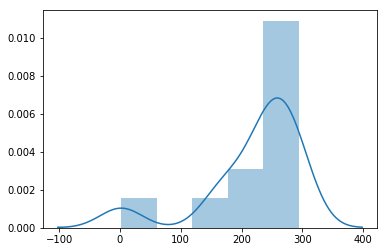

In [18]:
see_short_len_dist(SE)

In [19]:
SE_c = [i for i in SE if len(i)>100]
len(SE_c)

46

read from website: http://www.gutenberg.org/cache/epub/8789/pg8789.txt

Divine Comedy by Dante

In [20]:
DE_raw = get_soup('http://www.gutenberg.org/cache/epub/8789/pg8789.txt')

In [21]:
# Clean preface, conclusion and titles
DE_txt = slicer_back(slicer_front(DE_raw.get_text(),'IN the midway of this our'),'End of Project Gutenberg') # Delete the preface and conclusion


In [22]:
# the title are all capitalized, get rid of capitalized words
# split the text into each poem
DE = []
for i in DE_txt.split('\r\n\r\n\r\n'):
    i_c = re.sub('[A-Z \d\W]+\r\n','', i)
    DE.append(i_c)
len(DE)

36

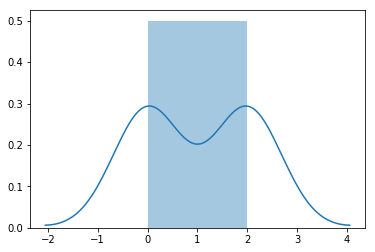

In [23]:
see_short_len_dist(DE)

In [24]:
DE_c = [i for i in DE if len(i)>10]
len(DE_c)

34

read from website: http://www.gutenberg.org/cache/epub/21700/pg21700.txt

Don Juan

In [25]:
DJ = get_soup('http://www.gutenberg.org/cache/epub/21700/pg21700.txt')

In [26]:
# Clean preface, conclusion and titles
DJ_txt = slicer_back(slicer_front(DJ.get_text(),'I want a hero: an uncommon want,'),'End of the Project Gutenberg EBook') # Delete the preface and conclusion



In [27]:
DJ = DJ_txt.split('\r\n\r\n')
len(DJ)

2044

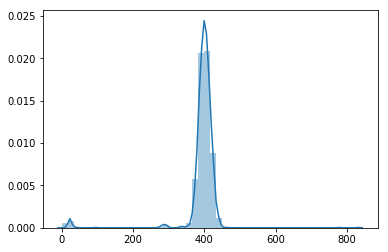

In [28]:
see_len_dist(DJ)

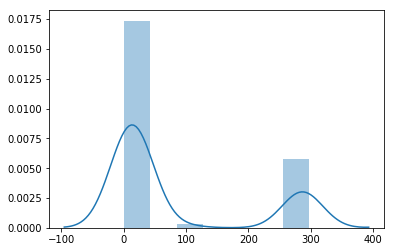

In [29]:
see_short_len_dist(DJ)

In [30]:
# append sentances
DJ_c = [i for i in DJ if len(i)> 50]
len(DJ_c)

1993

Read from website: http://www.gutenberg.org/cache/epub/6524/pg6524.txt

Stray Birds by Rabindranath Tagore

In [31]:
StaryB = get_soup('http://www.gutenberg.org/cache/epub/6524/pg6524.txt')

In [32]:
# Clean preface, conclusion and titles
# The titles are numbers
StaryB_txt = slicer_back(slicer_front(StaryB.get_text(),'Stray birds of summer come to my window to sing and fly away.'),'End of the Project Gutenberg EBook') # Delete the preface and conclusion
StaryB_txt = re.sub('[1-9]\d*','\r\n\r\n\r\n\r\n',StaryB_txt) # Clean the titles

In [33]:
StaryB = StaryB_txt.split('\r\n\r\n\r\n\r\n')
len(StaryB)

328

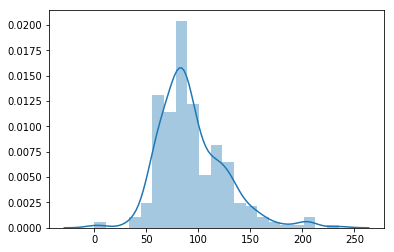

In [34]:
see_len_dist(StaryB)

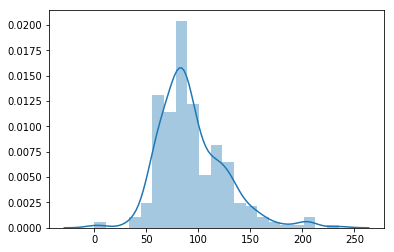

In [35]:
see_short_len_dist(StaryB)

In [36]:
# append sentances
StaryB_c = [i for i in StaryB if len(i)> 10]
len(StaryB_c)

326

Read from website: http://www.gutenberg.org/cache/epub/30488/pg30488.txt

The Green Helmet and Other Poems by William Butler Yeats

In [37]:
GH = get_soup('http://www.gutenberg.org/cache/epub/30488/pg30488.txt')

In [38]:
# Clean preface and conclusion
GH_txt = slicer_back(slicer_front(GH.get_text(),'I swayed upon the gaudy stern'),'One cannot begin it too soon.') # Delete the preface and conclusion
# the titles are all capitalized, get rid of capitalized words
GH_txt = re.sub('[A-Z \d\W]+\r\n\r\n','\r\n\r\n\r\n\r\n\r\n',GH_txt) # Clean the titles

In [39]:
# split the text into each poem
GH = GH_txt.split('\r\n\r\n\r\n\r\n\r\n')
len(GH)

39

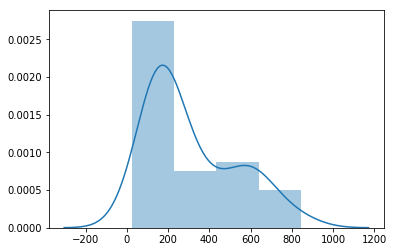

In [40]:
see_len_dist(GH)

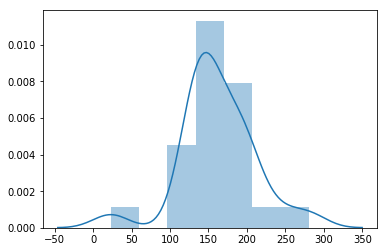

In [41]:
see_short_len_dist(GH)

In [42]:
GH_c = [i for i in GH if len(i)>150]
len(GH_c)

28

Read from website: http://www.gutenberg.org/files/38520/38520-0.txt

Poems of James Russell Lowell

In [43]:
JRL = get_soup('http://www.gutenberg.org/files/38520/38520-0.txt')

In [44]:
# Clean preface, conclusion and titles
JRL_txt = slicer_back(slicer_front(JRL.get_text(),'If some small savor creep into my rhyme'),'But is lord of the earldom as much as he.') # Delete the preface and conclusion
# the titles are all capitalized, get rid of capitalized words
JRL_txt = re.sub('[A-Z \d\W]+\r\n\r\n','\r\n\r\n\r\n\r\n\r\n',JRL_txt) # Clean the titles
JRL_txt = re.sub('[1-9]\d*\.','',JRL_txt) # Clean the numbers

In [45]:
# split the text into each poem
JRL = JRL_txt.split('\r\n\r\n\r\n\r\n\r\n')
len(JRL)

1111

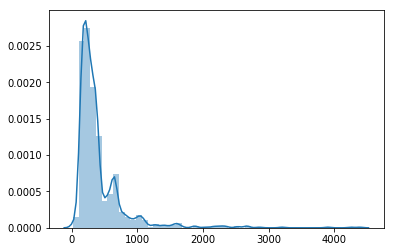

In [46]:
see_len_dist(JRL)

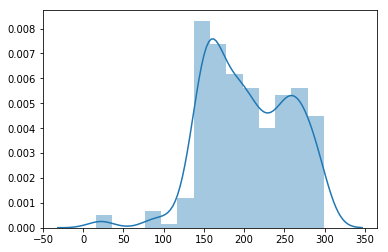

In [47]:
see_short_len_dist(JRL)

In [48]:
JRL_c = [i for i in JRL if len(i)>150]
len(JRL_c)

1025

Read from website: http://www.gutenberg.org/cache/epub/19188/pg19188.txt

Christina G. Rossetti

In [49]:
CGR = get_soup('http://www.gutenberg.org/cache/epub/19188/pg19188.txt')

In [50]:
# Clean preface, conclusion and titles
CGR_txt = slicer_back(slicer_front(CGR.get_text(),'Morning and evening'),'We trust to Thee.') # Delete the preface and conclusion

# Some of the titles are capitalized, some of the titles are numbers. 
# Get rid of capitalized words and numbers
CGR_txt = re.sub('[A-Z \d\W]+\r\n\r\n','\r\n\r\n\r\n\r\n\r\n',CGR_txt) # Clean the titles
CGR_txt = re.sub('[1-9]\d*\.','\r\n\r\n\r\n\r\n\r\n',CGR_txt) # Clean the numbers

In [51]:
# split the text into each poem
CGR = CGR_txt.split('\r\n\r\n\r\n\r\n\r\n')
len(CGR)

1653

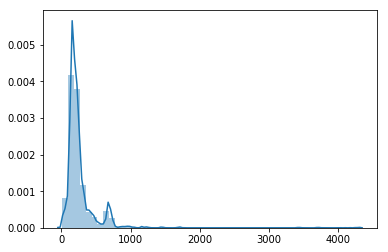

In [52]:
see_len_dist(CGR)

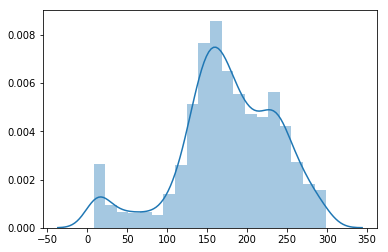

In [53]:
see_short_len_dist(CGR)

In [54]:
CGR_c = [i for i in CGR if len(i)>100]
len(CGR_c)

1531

In [56]:
corpus = DT_c+ CP_c+ SE_c+ DE_c+ DJ_c + StaryB_c + GH_c + JRL_c + CGR_c
#corpus

In [57]:
len(corpus)

5715